## FFM Application with Python

### 1. Create Test Signals
To study how FFT works, I first created code to generate multiple sine signals using the following general form of a sine wave.
$$y = A \sin(2\pi f t + \phi)$$

In [6]:
import numpy as np
import matplotlib.pyplot as plt 

class sinWave:
    def __init__(self, **kwargs):
        self.A = kwargs.get('amp', 1)
        self.f = kwargs.get('freq', 1)
        self.p = kwargs.get('phase_shift', 0)
        self.endTime = kwargs.get('endTime', 5)
        self.sampleTime = kwargs.get('sampleTime', 0.01)

    def getDomain(self):
        return np.arange(0.0, self.endTime, self.sampleTime)
        
    def createSinWave(self,time):        
        return self.A * np.sin(2*np.pi*self.f*time + self.p)
    
    def plotWave(self, **kwargs):
        xValue = self.getDomain()
        yValue = self.createSinWave(time=xValue)
        xLabel = kwargs.get('xLabel', 'time')
        yLabel = kwargs.get('yLabel','sin')
        
        plt.plot(xValue, yValue)
        # plt.grid(True)
        plt.xlabel(xLabel)
        plt.ylabel(yLabel)
        # plt.show() 

The following code generate three different sine waves, 

$2sin(2\pi)$,

$5sin(3\cdot2\pi)$, and

$9sin(2\cdot2\pi)$.

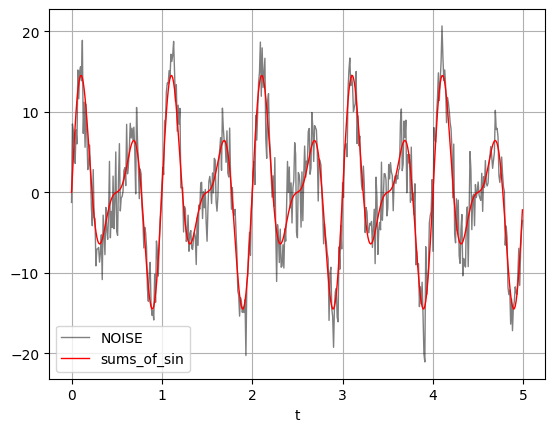

In [7]:
test_sin_wave1 = sinWave(amp = 2)
test_sin_wave2 = sinWave(amp = 5, freq = 3)
test_sin_wave3 = sinWave(amp = 9, freq = 2)
t = test_sin_wave1.getDomain()
test_result1 = test_sin_wave1.createSinWave(time = t)
test_result2 = test_sin_wave2.createSinWave(time = t)
test_result3 = test_sin_wave3.createSinWave(time = t)

test_y = test_result1 + test_result2 + test_result3
test_y_noise = test_y + 3*np.random.randn(len(t))

# plt.plot(t, test_result1, label=r"$2\sin {2\pi} t$", color="red", alpha=0.2)
# plt.plot(t, test_result2, label=r"$5\sin {6\pi} t$", color="green", alpha=0.2)
# plt.plot(t, test_result3, label=r"$9\sin {4\pi} t$", color="blue", alpha=0.2)
plt.plot(t, test_y_noise, label=r"NOISE", color="black", lw=1, alpha=0.5)
plt.plot(t, test_y, label=r"sums_of_sin", color="red", lw=1)
plt.grid(True); plt.legend()
plt.xlabel("t")
plt.show()

In [8]:
n = len(test_result1)               # number of sampling points
Fs = 1/test_sin_wave1.sampleTime    # sampling rate (# samples per second)
T = n/Fs                            # total time
k = np.arange(n)                    # index for frequency [0-(n-1)]
freq = k/T                          # plotting points

In [14]:
Y = np.fft.fft(test_y_noise)/n

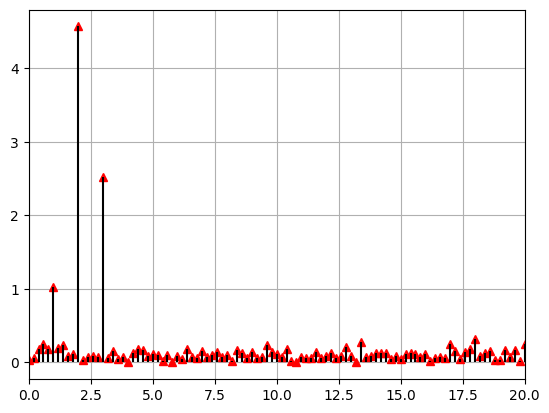

In [15]:
plt.plot(freq, abs(Y), 'red', linestyle=' ', marker='^')
plt.vlines(freq, [0], abs(Y), 'black')
plt.xlim(0,20)
plt.grid()

In [ ]:
Y = np.